# Question 1 - When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#upload cleaned data file
cleaned_data = pd.read_csv("cleaned_data.csv")

In [3]:
#add total delay time coloumn
cleaned_data["total delay"] = cleaned_data["ArrDelay"] + cleaned_data["DepDelay"] 

In [4]:
#get first 5 rows of dataset
cleaned_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total delay
0,0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,...,4,11,0,0,0,0,0,0,0,8.0
1,1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,...,5,6,0,0,0,0,0,0,0,21.0
2,2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,...,6,9,0,0,3,0,0,0,31,70.0
3,3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,...,3,8,0,0,23,0,0,0,3,56.0
4,4,2007,1,1,1,831.0,830,957.0,1000,WN,...,3,9,0,0,0,0,0,0,0,-2.0


In [5]:
#list out all coloumn names
list[cleaned_data.columns]

list[Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'total delay'],
      dtype='object')]

In [6]:
#get number of rows and coloumns in dataset
cleaned_data.shape

(14268928, 30)

# best day of the week to travel

In [7]:
#filter out unnecessary coloumns
week_data = cleaned_data[["DayOfWeek", "total delay"]]


In [8]:
week_data 

,DayOfWeek,total delay
0,1,8.0
1,1,21.0
2,1,70.0
3,1,56.0
4,1,-2.0
...,...,...
14268923,5,-10.0
14268924,5,92.0
14268925,5,16.0
14268926,5,-19.0


In [9]:
#group week_data by the day of the week and get average delay per day of week
week_data = week_data.groupby(["DayOfWeek"]).mean("total delay").reset_index()

In [10]:
week_data

,DayOfWeek,total delay
0,1,20.727735
1,2,15.727345
2,3,18.692676
3,4,24.364580
4,5,25.919547
5,6,14.098849
6,7,20.230781


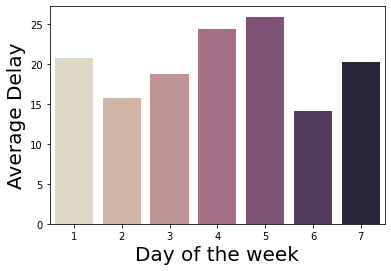

In [11]:
#plot week_data onto a barplot
sns.barplot(data = week_data, x= "DayOfWeek", y="total delay",palette=sns.color_palette("ch:s=-.2,r=.6", n_colors=7))
plt.xlabel("Day of the week",size=20)
plt.ylabel("Average Delay",size=20)
plt.show()

# best time of the year

In [12]:
#filter out unnecessary coloumns and assign it to month_data
month_data = cleaned_data[["Month","total delay"]]
month_data

,Month,total delay
0,1,8.0
1,1,21.0
2,1,70.0
3,1,56.0
4,1,-2.0
...,...,...
14268923,12,-10.0
14268924,12,92.0
14268925,12,16.0
14268926,12,-19.0


In [13]:
#group month_data by months and get average delay per month
month_data = month_data.groupby(["Month"]).mean("total_delay").reset_index()


In [14]:
month_data

,Month,total delay
0,1,16.572149
1,2,22.043757
2,3,19.762064
3,4,16.572992
4,5,15.323722
5,6,28.572966
6,7,26.371262
7,8,22.239717
8,9,13.348714
9,10,17.732663


In [15]:
#assign each month to it's respective season
month_data["Month"] = month_data["Month"].replace([1, 2, 12, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                                                ["Winter", "Winter", "Winter", "Spring","Spring",
                                                "Spring", "Summer", "Summer", "Summer", "Fall", "Fall", "Fall"])


In [16]:
month_data

,Month,total delay
0,Winter,16.572149
1,Winter,22.043757
2,Spring,19.762064
3,Spring,16.572992
4,Spring,15.323722
5,Summer,28.572966
6,Summer,26.371262
7,Summer,22.239717
8,Fall,13.348714
9,Fall,17.732663


In [17]:
#group month_data by season
month_data = month_data.groupby(["Month"]).mean("total_delay").reset_index()

In [18]:
month_data

,Month,total delay
0,Fall,15.075302
1,Spring,17.219593
2,Summer,25.727982
3,Winter,22.309441


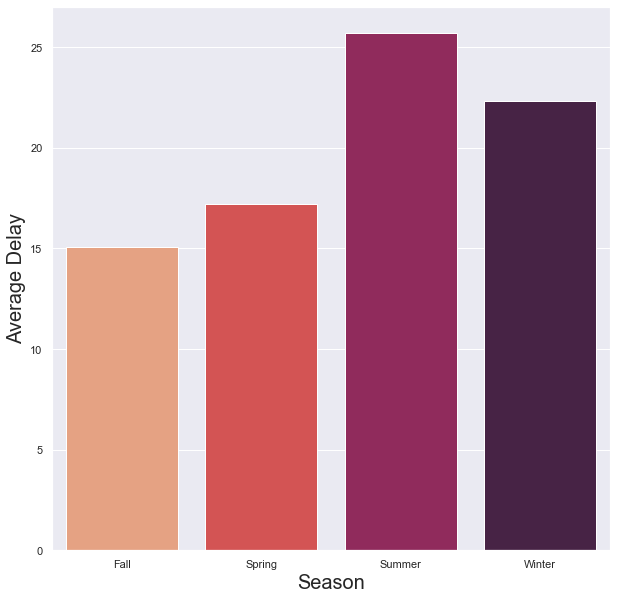

In [23]:
#plot month_data onto barplot
sns.cubehelix_palette(as_cmap=True)
sns.barplot(data = month_data, x= "Month", y= "total delay",palette=sns.color_palette('rocket_r', n_colors=4))
plt.xlabel("Season",size=20)
plt.ylabel("Average Delay",size=20)
plt.show()

# Best time of day

In [20]:
#filter unnecassary coloumns out and assign relevant coloumns to time_data 
time_data = cleaned_data[["CRSDepTime", "total delay"]]
time_data.head()

,CRSDepTime,total delay
0,1225,8.0
1,1905,21.0
2,2130,70.0
3,1200,56.0
4,830,-2.0


In [21]:
#define function that groups time of departure into increments of 3 hour durations 
import warnings
warnings.filterwarnings("ignore")
time = time_data["CRSDepTime"]
def get_time(time):
    time = int(time)
    if time >= 0 and time <= 259:
        return '00:00 - 2:59'
    elif time >= 300 and time <= 559:
        return '3.00 - 5:59'
    elif time >= 600 and time <= 859:
        return '6.00 - 8.59'
    elif time >= 900 and time <= 1159:
        return '9:00 - 11:59'
    elif time >= 12 and time <= 1459:
        return '12:00 - 14.59'
    elif time >= 1500 and time <= 1759:
        return '15:00 - 17:59'
    elif time >= 1800 and time >= 2059:
        return '18:00 - 20:59'
    else:
        return '21:00 - 23.59'

#apply get_time onto dataset and group data based on 3-hour slots
time_data["CRSDepTime"] = time_data["CRSDepTime"].apply(get_time)
time_data = time_data.groupby(["CRSDepTime"]).mean('total delay').reset_index()
time_data = time_data.sort_values(by =['total delay'],ascending=False)
time_data


,CRSDepTime,total delay
4,21:00 - 23.59,34.834723
2,15:00 - 17:59,30.289625
3,18:00 - 20:59,26.561427
1,12:00 - 14.59,20.923513
7,9:00 - 11:59,12.330541
0,00:00 - 2:59,9.185624
6,6.00 - 8.59,5.094844
5,3.00 - 5:59,2.669892


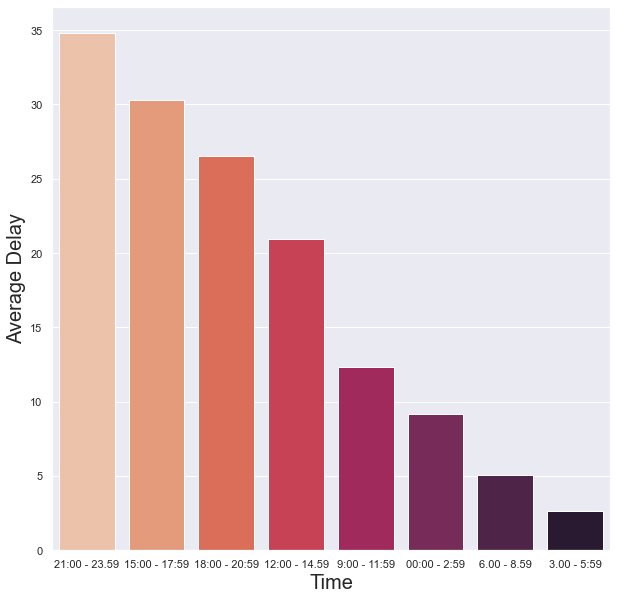

In [22]:
#plost time_data onto barplot

sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(data = time_data, x= 'CRSDepTime', y= 'total delay',palette=sns.color_palette('rocket_r', n_colors=8))
plt.xlabel("Time",size=20)
plt.ylabel("Average Delay",size=20)
plt.show()